



Epoch 1/20


288/288 [==============================] - 1s 3ms/step - loss: 0.3079 - accuracy: 0.8510 - val_loss: 0.2774 - val_accuracy: 0.8578
Epoch 2/20
288/288 [==============================] - 1s 3ms/step - loss: 0.2692 - accuracy: 0.8707 - val_loss: 0.2683 - val_accuracy: 0.8683
Epoch 3/20
288/288 [==============================] - 1s 2ms/step - loss: 0.2484 - accuracy: 0.8836 - val_loss: 0.2419 - val_accuracy: 0.8878
Epoch 4/20
288/288 [==============================] - 1s 2ms/step - loss: 0.2338 - accuracy: 0.8935 - val_loss: 0.2324 - val_accuracy: 0.8891
Epoch 5/20
288/288 [==============================] - 1s 2ms/step - loss: 0.2223 - accuracy: 0.8997 - val_loss: 0.2275 - val_accuracy: 0.8926
Epoch 6/20
288/288 [==============================] - 1s 2ms/step - loss: 0.2132 - accuracy: 0.9040 - val_loss: 0.2350 - val_accuracy: 0.8861
Epoch 7/20
288/288 [==============================] - 1s 2ms/step - loss: 0.2051 - accuracy: 0.9101 - val_loss: 0.2224 - val_accuracy: 0.9013


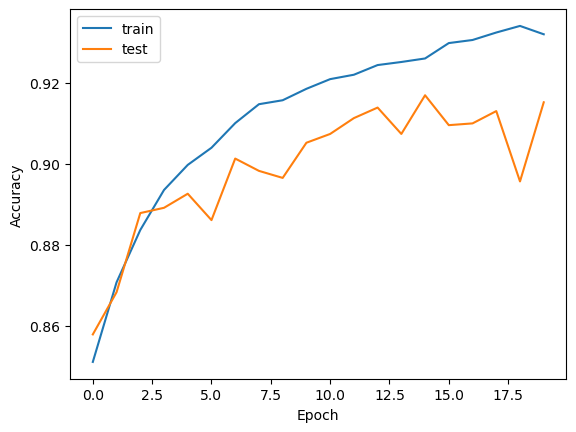

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 1)                 5409      
                                                                 
Total params: 5729 (22.38 KB)
Trainable params: 5729 (22.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


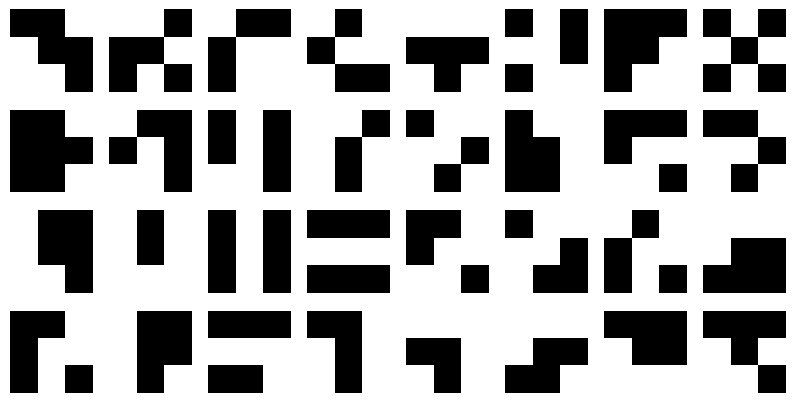

1/1 [==============================] - 0s 53ms/step


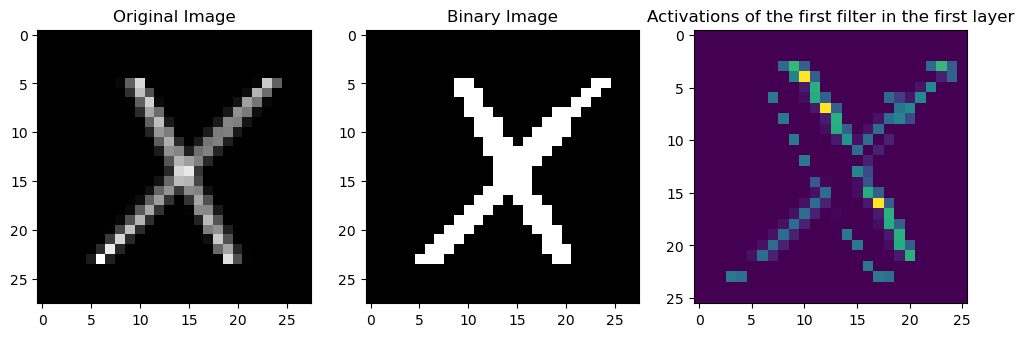

Binary Weights for layer: [[[[-1  1  1  1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1
     1  1 -1  1 -1 -1  1  1 -1 -1]]

  [[-1  1 -1 -1  1  1 -1  1 -1 -1  1  1  1  1 -1 -1 -1 -1  1 -1 -1  1
    -1  1 -1 -1 -1 -1  1  1 -1 -1]]

  [[ 1 -1 -1  1  1 -1 -1 -1  1 -1 -1 -1  1  1 -1  1 -1  1 -1 -1  1  1
     1  1  1 -1 -1  1  1  1 -1 -1]]]


 [[[ 1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1 -1 -1  1  1  1 -1  1 -1  1
    -1  1 -1  1  1  1 -1  1  1  1]]

  [[-1 -1  1  1 -1  1 -1 -1 -1  1  1 -1  1 -1  1  1 -1 -1  1  1  1  1
     1 -1  1 -1  1 -1 -1 -1 -1 -1]]

  [[-1  1  1  1 -1 -1  1  1 -1 -1 -1  1 -1  1  1 -1 -1  1 -1  1  1 -1
     1 -1  1 -1  1  1  1 -1 -1  1]]]


 [[[ 1 -1 -1  1  1 -1 -1 -1 -1  1  1  1  1 -1  1  1  1  1 -1 -1  1  1
    -1 -1 -1  1 -1  1  1 -1  1  1]]

  [[ 1  1  1 -1 -1  1  1  1 -1  1  1 -1 -1 -1  1 -1  1  1  1 -1  1 -1
     1 -1  1 -1 -1 -1 -1 -1  1  1]]

  [[-1 -1  1 -1  1  1  1 -1  1 -1 -1  1  1  1 -1  1 -1  1 -1 -1 -1 -1
    -1 -1 -1  1  1  1  1  1  1 -1]]]]
Biases

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load the dataset
data = pd.read_csv(r'C:\Users\Windows\Downloads\archive\2_character_TMNIST.csv')  # Update the path to your dataset file

# Separate data into features (X) and labels (y)
X = data.drop(columns=['names', 'labels'])
y = data['labels']

# Convert 'X' and 'O' labels to binary values (1 for 'X' and 0 for 'O')
y_binary = (y == 'X').astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Reshape data for CNN input
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

# Normalize the data
X_train, X_test = X_train / 255.0, X_test / 255.0

# Convert grayscale to binary
X_train_binary = (X_train > 0.05).astype(float)
X_test_binary = (X_test > 0.05).astype(float)

# Create a CNN model with binary filters
binary_model = Sequential()
binary_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
binary_model.add(MaxPooling2D((2, 2)))
binary_model.add(Flatten())
binary_model.add(Dense(1, activation='sigmoid'))

# Compile the model
binary_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model for more epochs
history = binary_model.fit(X_train_binary, y_train, epochs=20, validation_data=(X_test_binary, y_test))

# Evaluate the model
test_loss, test_accuracy = binary_model.evaluate(X_test_binary, y_test)
print(f'Test accuracy: {test_accuracy}')

# Plot training history
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model Summary (Architecture)
binary_model.summary()

# Visualize binary filters
binary_filters, biases = binary_model.layers[0].get_weights()
plt.figure(figsize=(10, 5))
for i in range(binary_filters.shape[3]):
    binary_filters[:, :, 0, i] = 2 * (binary_filters[:, :, 0, i] > 0) - 1  # Convert 0 to -1 and 1 to 1
    plt.subplot(4, 8, i + 1)
    plt.imshow(binary_filters[:, :, 0, i], cmap='gray')
    plt.axis('off')
plt.show()

# Visualize activations
from tensorflow.keras.models import Model

# Create a model to output the activations of the first layer
activation_model = Model(inputs=binary_model.input, outputs=binary_model.layers[0].output)

# Get activations for a sample input
sample_activation = activation_model.predict(X_train_binary[0].reshape(1, 28, 28, 1))

# Visualize original, normalized, and binary images
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(X_train[0].reshape(28, 28), cmap='gray')
plt.title('Original Image')

plt.subplot(132)
plt.imshow(X_train_binary[0].reshape(28, 28), cmap='gray')
plt.title('Binary Image')

plt.subplot(133)
plt.imshow(sample_activation[0, :, :, 0], cmap='viridis')
plt.title('Activations of the first filter in the first layer')

plt.show()

# Print final binary weights
for layer in binary_model.layers:
    if layer.get_weights():
        binary_weights, biases = layer.get_weights()
        binary_weights = 2 * (binary_weights > 0) - 1  # Convert 0 to -1 and 1 to 1
        print(f"Binary Weights for layer: {binary_weights}")
        print(f"Biases for layer: {biases}")
